In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pymc3 as pm
import pymc3.distributions.continuous as pmdc
import scipy.stats as stats
import itertools
import scipy.special

# Ejercicio 1

Implementación:
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.


Impementamos la funcion "plt_" que crea el modelo con los prámetros 'n=cantidad de ensayos, h= cantidad de éxitos, alpha y beta de la función beta'. Luego graficamos un histograma de la distribución.

Queremos evaluar cuan cargada está nuestra moneda a partir del resultado de un experimento, a lo cual llamamos posterior. Creamos un modelo con los parámetros ya mencionados. En el modelo, relacionamos el valor de alfa y beta con la confianza que tenemos en que la moneda no esté cargada. Vemos que a medida que tenemos más confianza sobre la moneda representada por nuestro prior, es decir, que estamos más seguros que es honesta, menos nos alcanza el resultado(salieron 6 caras en 6 tiradas), para decir que la moneda esté cargada.


In [2]:
def plt_(n,h,alpha,beta):
# Misterio
    niter = 2000
    with pm.Model() as model: # context management
        # define priors
        p = pm.Beta('p', alpha=alpha, beta=beta)

        # define likelihood
        y = pm.Binomial('y', n=n, p=p, observed=h)

        # inference
        #start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
        #print 'start',start
        #step = pm.Metropolis() # Have a choice of samplers
        #trace = pm.sample(niter, step, start, progressbar=True)
        trace = pm.sample(niter, random_seed=0, progressbar=True)
    plt.figure(figsize=(20,5))
    _, bins, rectangles = plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
    plt.title('Histograma ' +  str(alpha) + ', ' + str(beta) + " n: " + str(n) + "k: " + str(h))
    plt.show()
    plt.clf()
    plt.figure(figsize=(20,5))
    x = np.linspace(0, 1, 100)
    maximo=max(stats.beta.pdf(x, alpha, beta))
    minimo=min(stats.beta.pdf(x, alpha, beta))
    plt.plot(x, (stats.beta.pdf(x, alpha, beta)), label='prior');
    plt.title('Beta ' + str(alpha) + ', ' + str(beta) + " n: " + str(n) + "k: " + str(h))
    plt.axvline(x=0.5, linestyle="--", linewidth=2.0, color="black")
    plt.legend(loc='best');
    plt.show()
    plt.clf()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2497/2500 [00:06<00:00, 413.16it/s]/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/env/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 750 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:06<00:00, 412.67it/s]


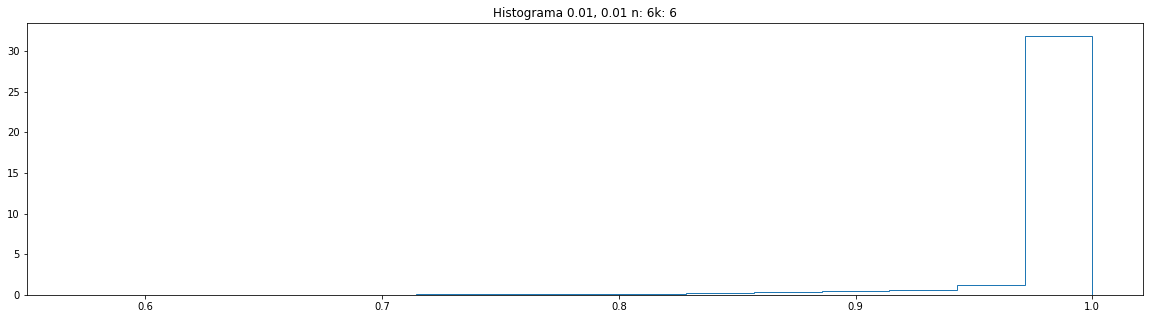

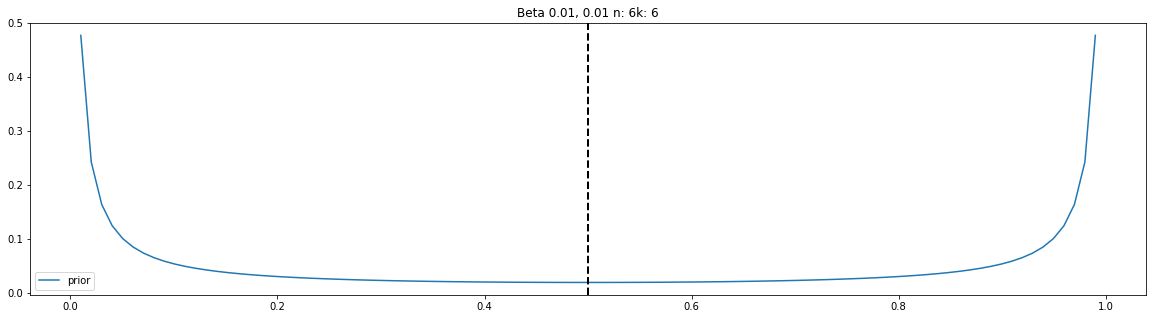

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:02<00:00, 1212.47it/s]


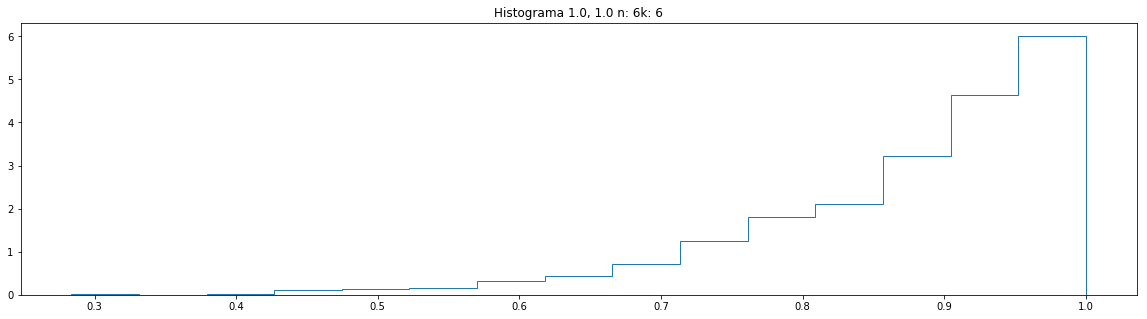

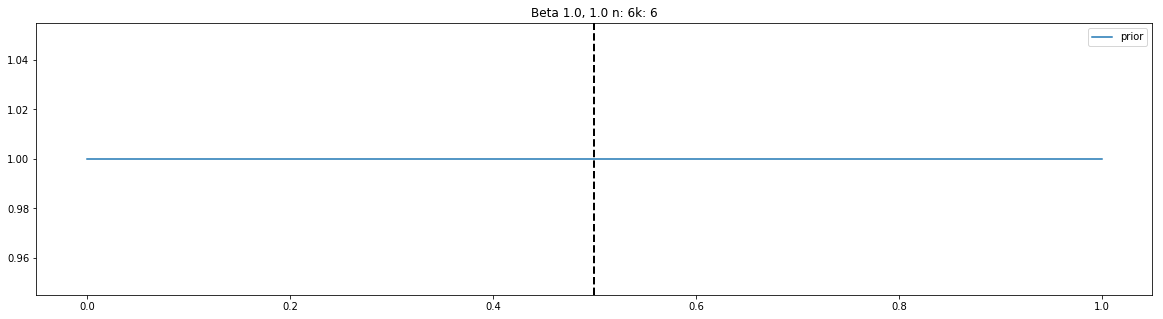

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1324.44it/s]


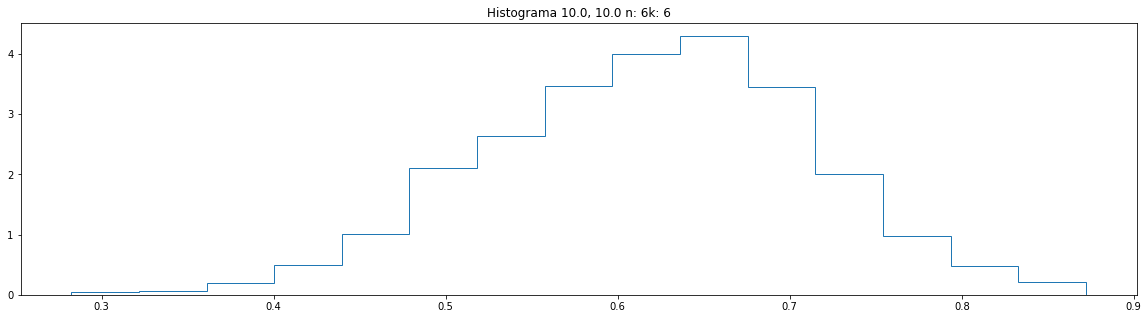

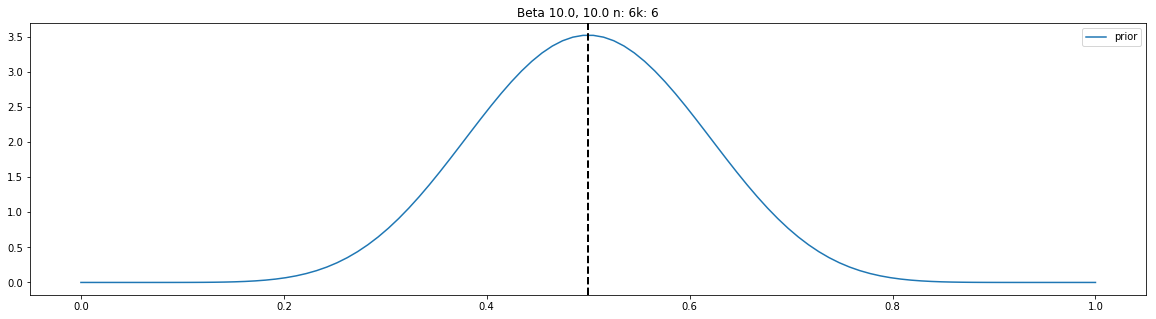

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1289.62it/s]


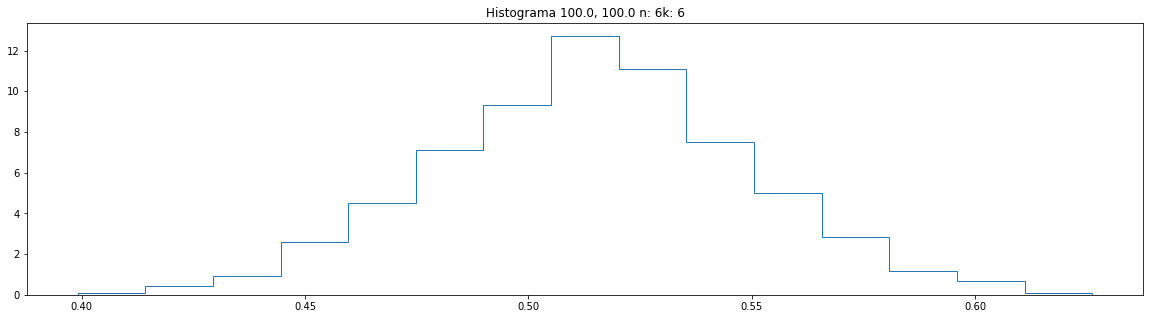

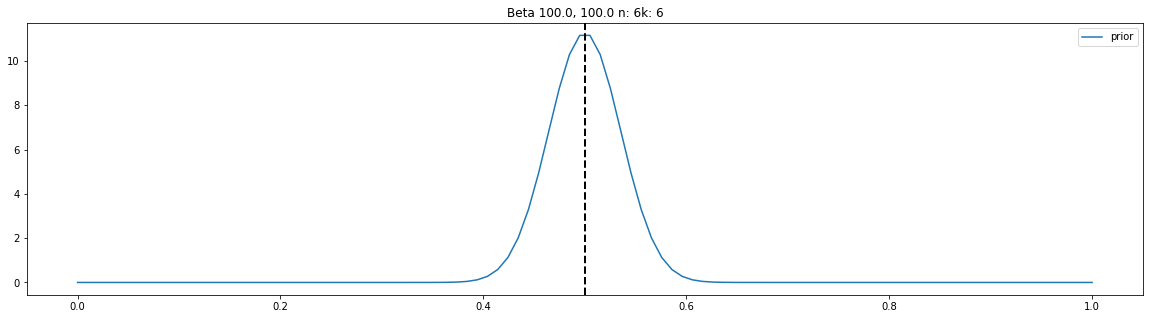

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1367.69it/s]


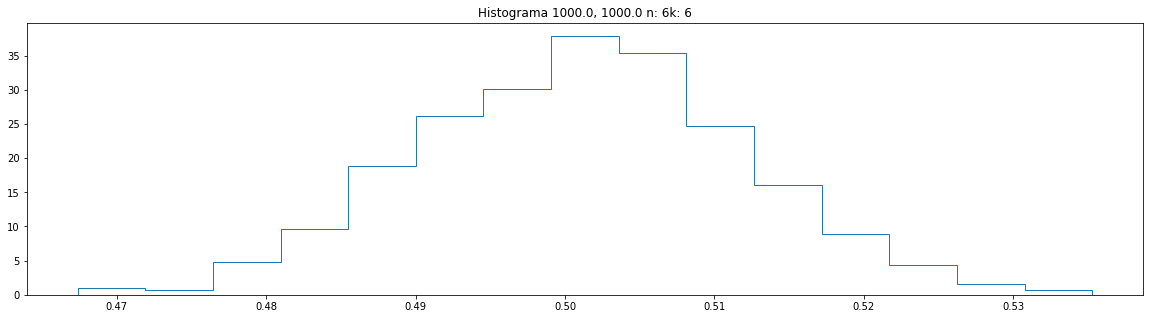

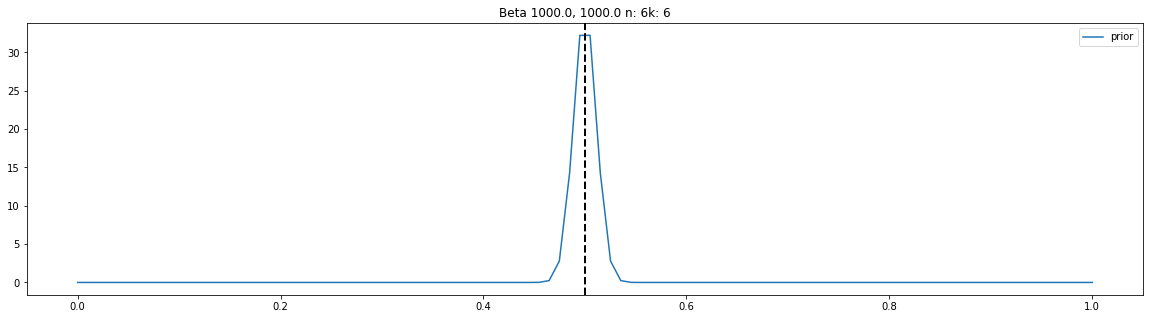

In [129]:
plt_(6,6,0.01,0.01)
plt_(6,6,1.0,1.0)
plt_(6,6,10.0,10.0)
plt_(6,6,100.0,100.0)
plt_(6,6,1000.0,1000.0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1370.08it/s]


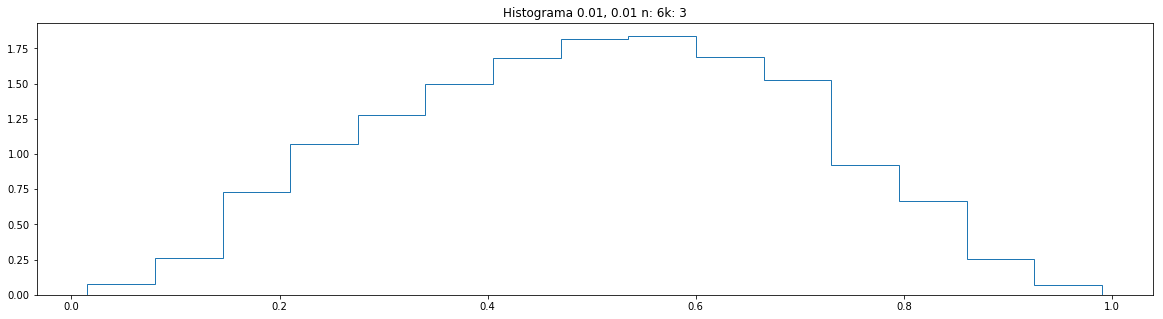

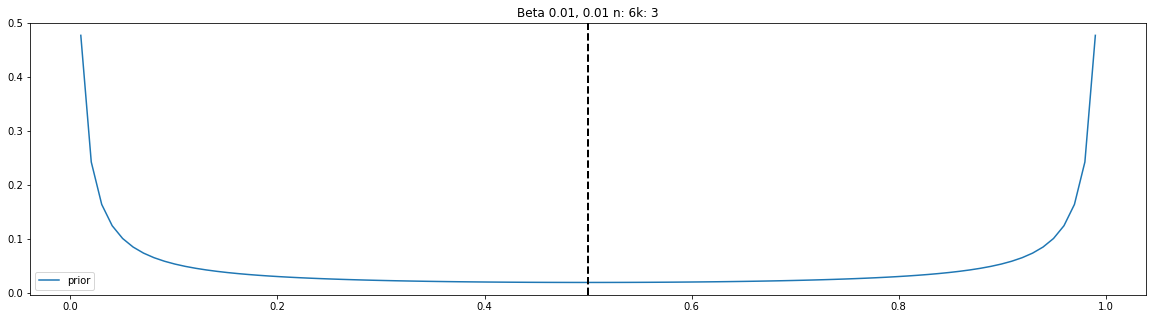

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1382.28it/s]


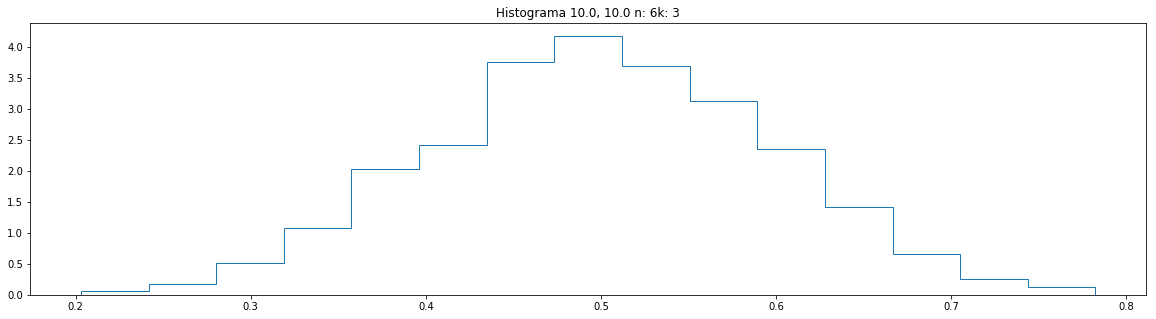

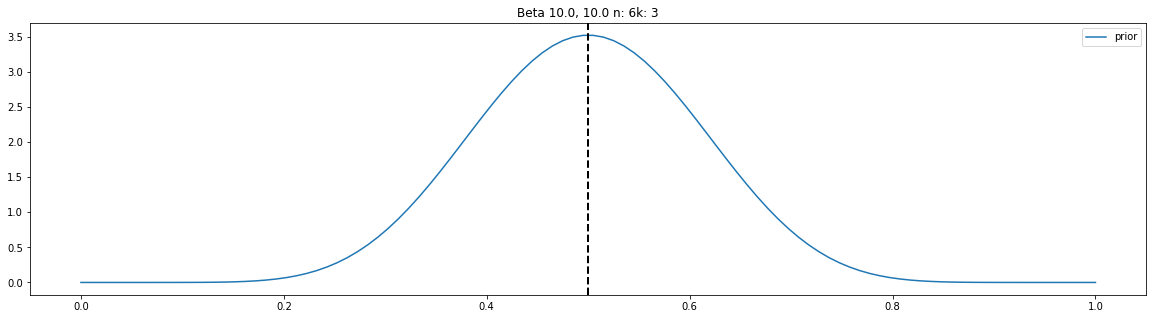

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1391.58it/s]


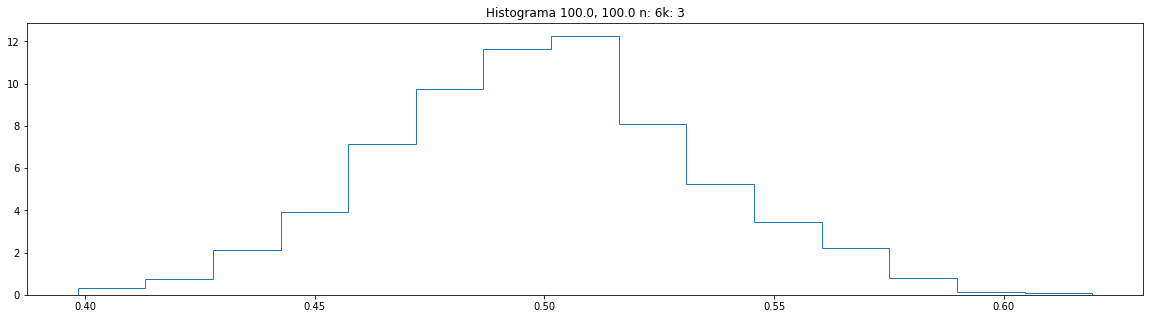

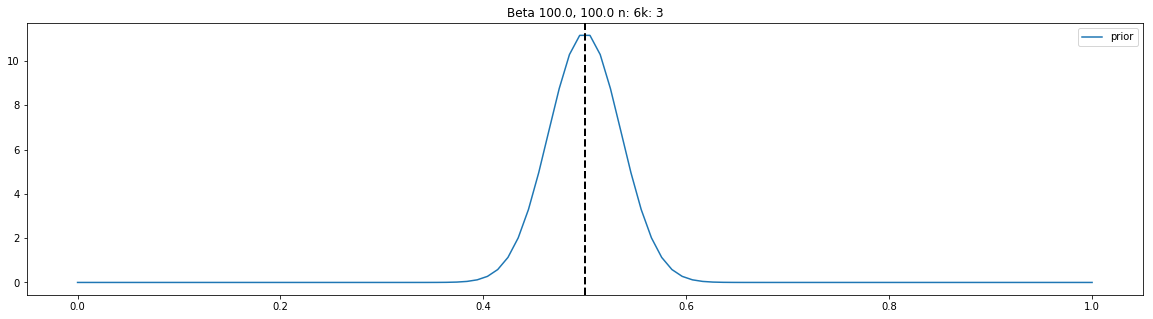

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1414.28it/s]


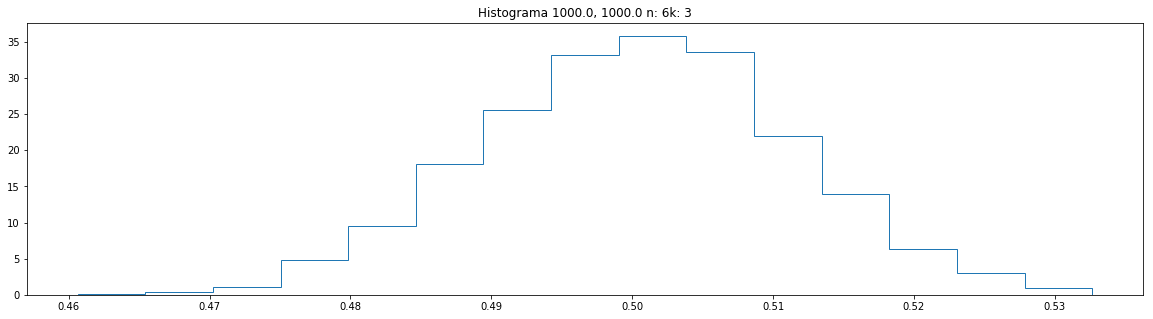

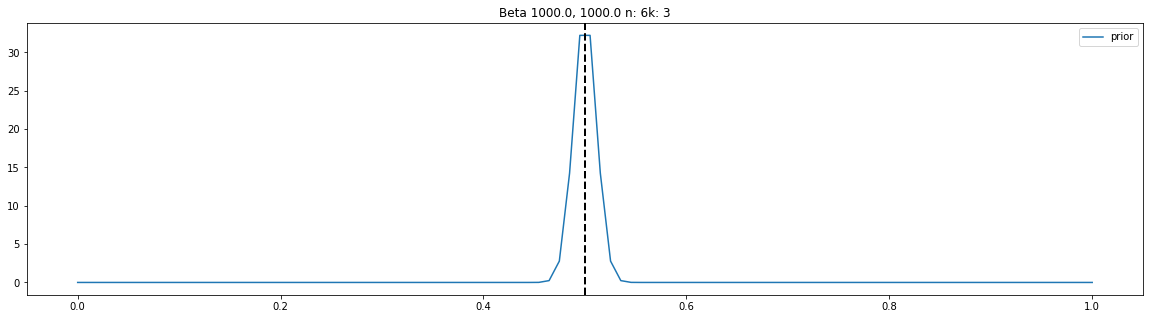

In [130]:
plt_(6,3,0.01,0.01)
plt_(6,3,10.0,10.0)
plt_(6,3,100.0,100.0)
plt_(6,3,1000.0,1000.0)

# Ejercicio 2

Resúmenes: Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

Calculamos en MAP para alfa=beta=1 y para alfa=beta=100, con el objetivo de encontrar el theta que maximiza la distrubución de nuestra postirior.
Resultó que para alfa=beta=1, el máximo theta es aproximadamente 1, lo que significa que para una moneda que no tenemos referencia si está cargada o no, la mayor probabilidad que obtengamos en 6 tiradas 6 éxitos, es que haya estado cargada. Por otra parte, para alfa=beta=100 el máximo theta es aproximadamente 0.51.
Esto significa que si estamos más seguros que nuestra moneda es honesta, los resultados nos conducen a la creencia
de que lo más probable es que la moneda esté apenas cargada.

## MAP 

In [2]:
def map_values(n,h,alpha,beta):
    model = pm.Model()
    with model: # context management
        # define priors
        prior = pm.Beta('prior', alpha=alpha, beta=beta)

        # define likelihood
        y = pm.Binomial('y', n=n, p=prior, observed=h)

        # inference
        
    MAP = pm.find_MAP(model=model) # Use MAP estimate (optimization) as the initial state for MCMC
        
    return MAP
        

In [40]:
MAP = map_values(6,6,1.0, 1.0)
MAP

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1591.07it/s]  


{'prior': array(0.9999984620831801),
 'prior_logodds__': array(13.385080233683778)}

In [29]:
MAP = map_values(6,6,100.0, 100.0)
MAP

logp = -1.7368, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1066.48it/s]


{'prior': array(0.5147058823475196),
 'prior_logodds__': array(0.05884050000122833)}

## mean

In [101]:
def mean_(n_iter, n, h, alpha, beta):
    niter = 2000
    with pm.Model() as model: # context management
        # define priors
        p = pm.Beta('p', alpha=alpha, beta=beta)

        # define likelihood
        y = pm.Binomial('y', n=n, p=p, observed=h)

        trace = pm.sample(niter, random_seed=0, progressbar=True)
    return trace

In [102]:
values_beta_1_1 = mean_(3000, 6, 6, 1.0, 1.0 )
values_beta_1_1 = np.array([v['p'] for v in list(values_beta_1_1)])
print np.mean(values_beta_1_1)

values_beta_100_100 = mean_(3000, 6, 6, 100.0, 100.0 )
values_beta_100_100 = np.array([v['p'] for v in list(values_beta_100_100)])
print np.mean(values_beta_100_100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1283.94it/s]


0.882759723658


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1317.34it/s]


0.514225339681


# Ejercicio 3

Predicción: Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

Resultó que si no tenemos conocimiento sobre la moneda (alfa=beta=1), obtenemos una distribución de cantidad de caras cercana a 6, lo que es razonable, dado que lo más probable era tener una moneda cargada (ej anterior).
De igual modo, si estábamos más seguros que nuestra moneda era honesta (alfa=beta=100), nos da una distribución de cantidad de caras por experimento más cercana a una normal, con en promedio 3 caras por experimento, que también coincide con lo esperado(por el ejercicio anterior).

### beta 1 1, con cara

In [103]:
values_beta_1_1

array([ 0.98932008,  0.99776125,  0.99862939, ...,  0.93541706,
        0.64733428,  0.86522375])

In [104]:
sum_cara = 0
for theta in values_beta_1_1:
    sum_cara += (theta) * (theta/len(values_beta_1_1)) # p(y2|theta)*p(theta|y)
print sum_cara


0.791381210087


### beta 1 1, con ceca

In [105]:
sum_ceca = 0
for theta in values_beta_1_1:
    sum_ceca += (1 - theta) * (theta/len(values_beta_1_1)) # p(y2|theta)*p(theta|y)
print sum_ceca


0.09137851357


### beta 100 100, con cara

In [106]:
sum_cara = 0
for theta in values_beta_100_100:
    sum_cara += (theta) * (theta/len(values_beta_100_100)) # p(y2|theta)*p(theta|y)
print sum_cara


0.265567329197


### beta 100 100, con ceca

In [107]:
sum_ceca = 0
for theta in values_beta_100_100:
    sum_ceca += (1 - theta) * (theta/len(values_beta_100_100)) # p(y2|theta)*p(theta|y)
print sum_ceca

0.248658010484


In [115]:
def ej3_(n,h,alpha,beta):
    niter = 2000
    with pm.Model() as model: # context management
        # define priors
        p = pm.Beta('p', alpha=alpha, beta=beta)

        # define likelihood
        y = pm.Binomial('y', n=n, p=p, observed=h)

        # inference
        trace = pm.sample(niter, random_seed=0, progressbar=True)
        
        res = pm.sample_ppc(trace, samples=5)
        
    return res


In [117]:
ej3_(6,6,1.0,1.0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 97%|█████████▋| 2427/2500 [00:01<00:00, 1331.05it/s]/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/env/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.690283894964, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 5/5 [00:00<00:00, 2167.37it/s]


{'y': array([5, 6, 6, 5, 5])}

In [121]:
ej3_(6,6,100.0,100.0) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5/5 [00:00<00:00, 1850.48it/s]


{'y': array([4, 3, 3, 2, 4])}

Es comprensible pensar que cuando mi creencia acerca de mi Beta (o en otras palabras mi theta inicial) es muy fuerte (centralidad cerca de la media) las probabilidades o inferencias que tengo de la futura distribucion de outcomes (en este caso tiradas de seis monedas) sea coherente a mi creencia inicial. En otras palabras mi creencia es resistente a la modificación.  

## Ejercicio 4

Otros datos: Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en la que se observan 3 caras de 3 tiradas. ¿Que puede concluir de los priors elegidos? ¿Y del modelo en general?


Lo que ocurre es que se profundizan los conceptos que observamos para el experimento con 6 tiradas y 6 caras.
En general los datos tienen la misma tendencia, se observan pequeñas variaciones, que corresponden a la cantidad de evidencia que se tiene sobre la moneda. 

A continuación analizamos las distintas posibilidades:

Mucha evidencia (20,20) pero confianza en que es honesta Beta(100,100): Moneda algo cargada. MAP = 0.54

Mucha evidencia (20,20) y poca confianza Beta(1,1): Moneda muy cargada. MAP = 0.9999

Poca evidencia (3,3) y mucha confianza Beta(100,100): Moneda honesta. MAP = 0.51

Poca evidencia (3,3) pero poca confianza en moneda honesta Beta(1,1): Moneda muy cargada. MAP = 0.9999

El prior juega un papel fundamental, especialmente en ausencia de evidencia significativa 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▊| 2466/2500 [00:05<00:00, 424.83it/s]/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/env/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 761 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:05<00:00, 423.30it/s]


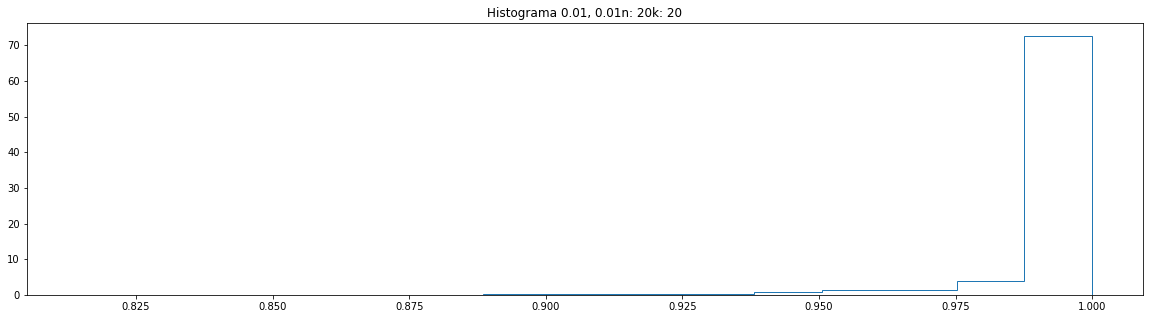

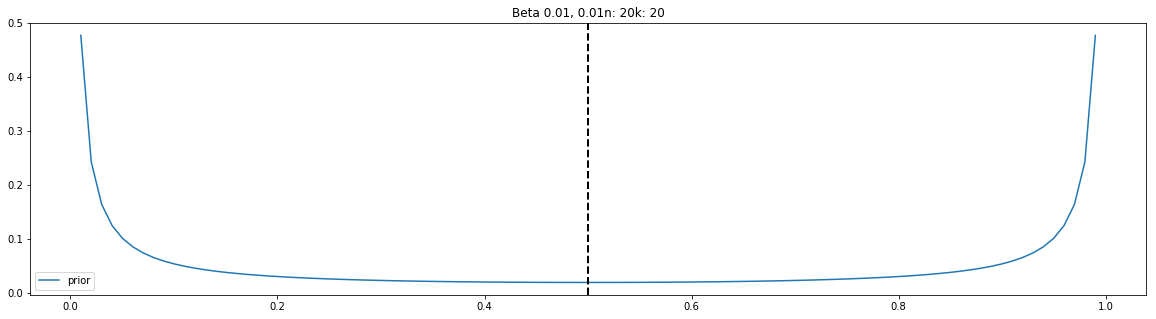

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1268.40it/s]


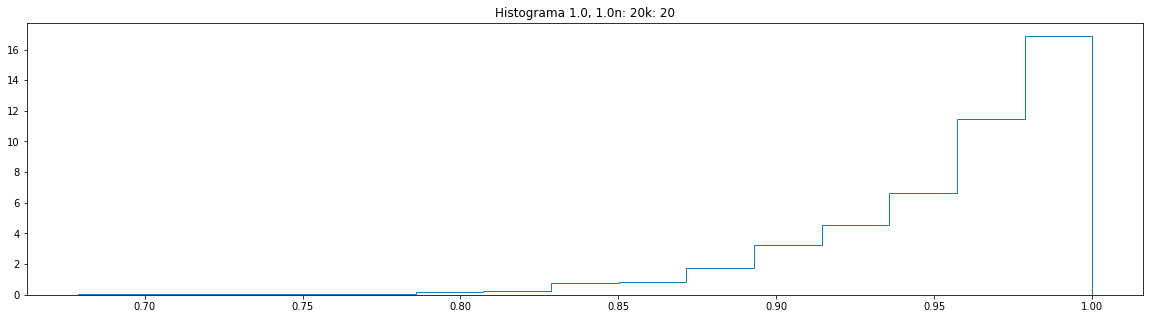

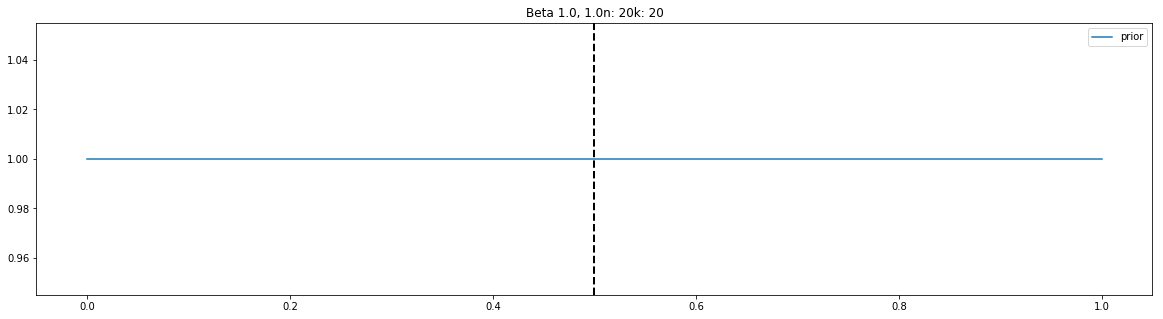

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1387.58it/s]


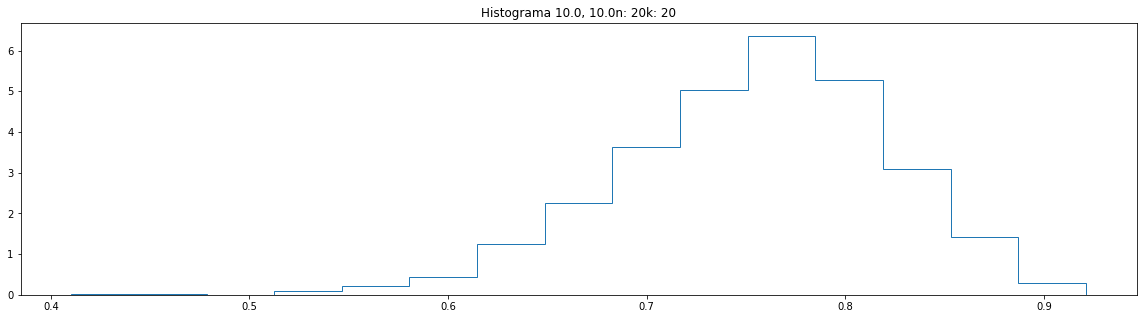

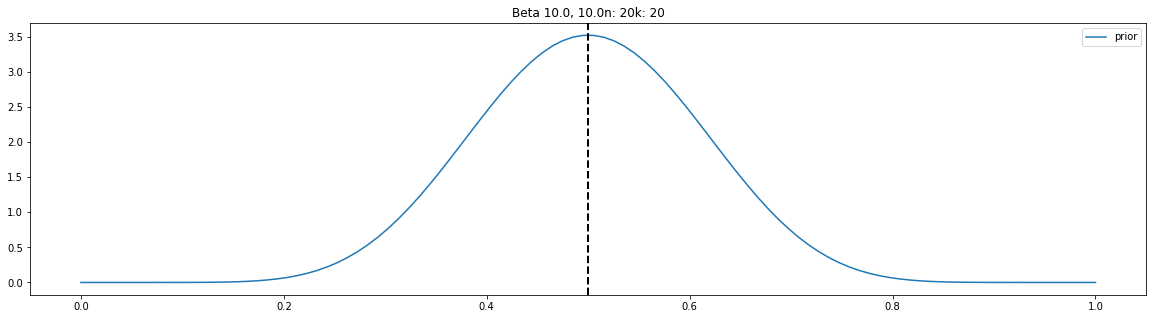

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1371.38it/s]


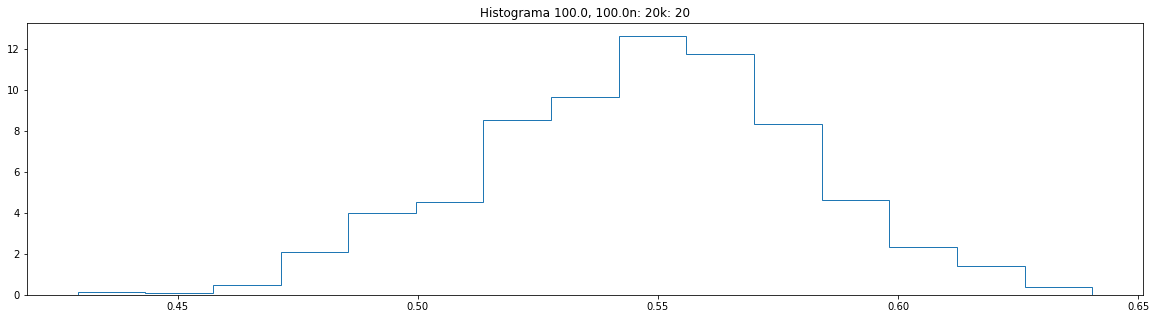

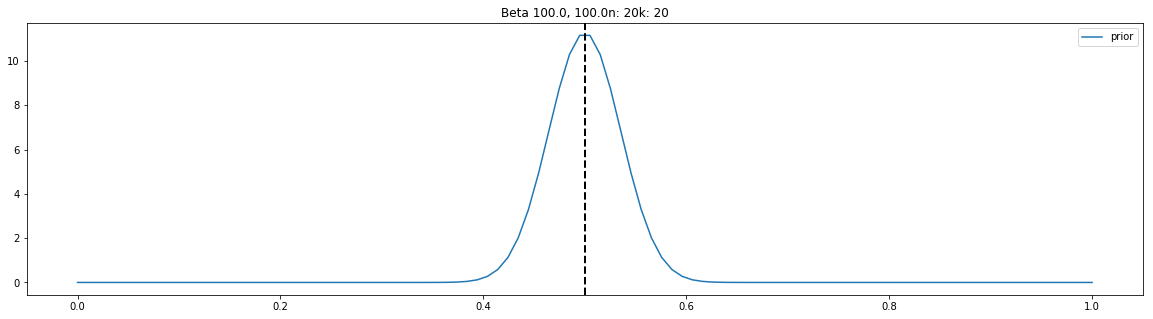

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 96%|█████████▌| 2392/2500 [00:01<00:00, 1380.89it/s]/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/env/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.889874620608, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:01<00:00, 1376.06it/s]


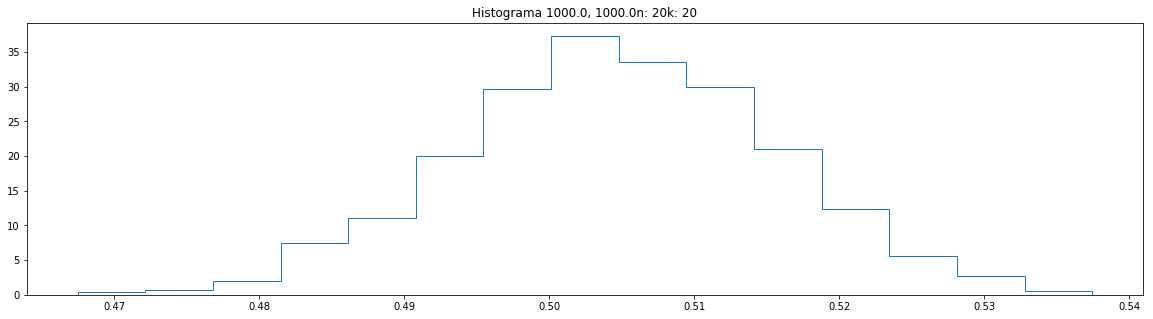

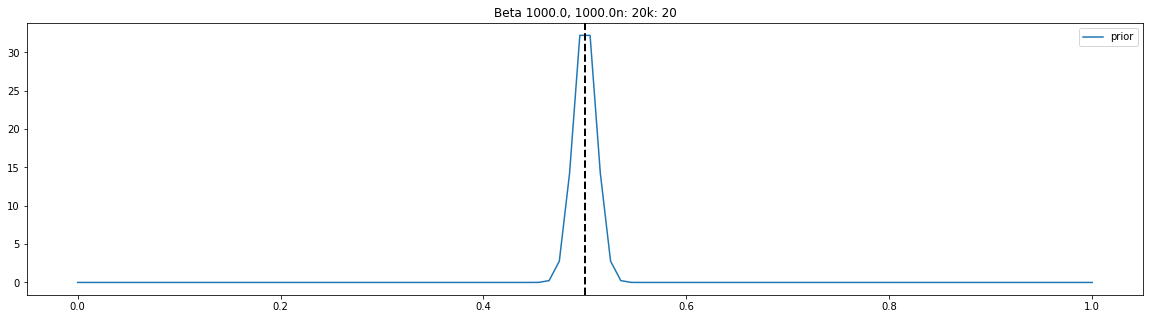

Map 20,20 beta 100


logp = -11.441, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1315.24it/s]


{'prior_logodds__': array(0.18400364050657034), 'prior': array(0.5458715590206333)}
Map 20,20 beta 1

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1624.21it/s]  



{'prior_logodds__': array(14.771376390280462), 'prior': array(0.9999996155210419)}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:04<00:00, 580.70it/s]


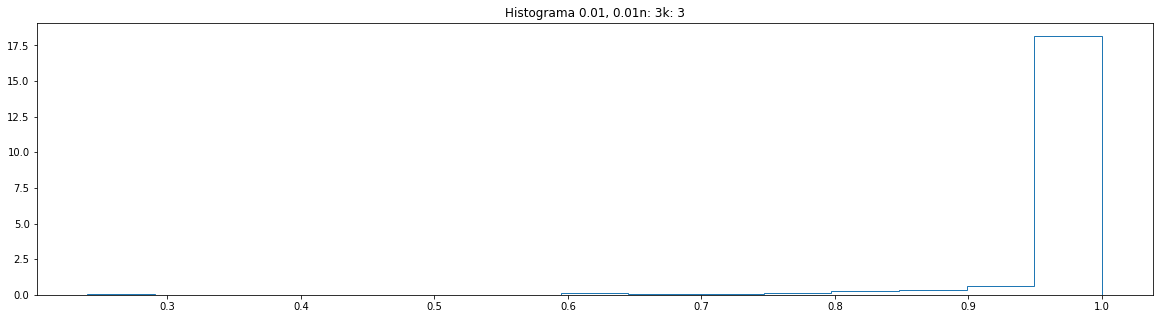

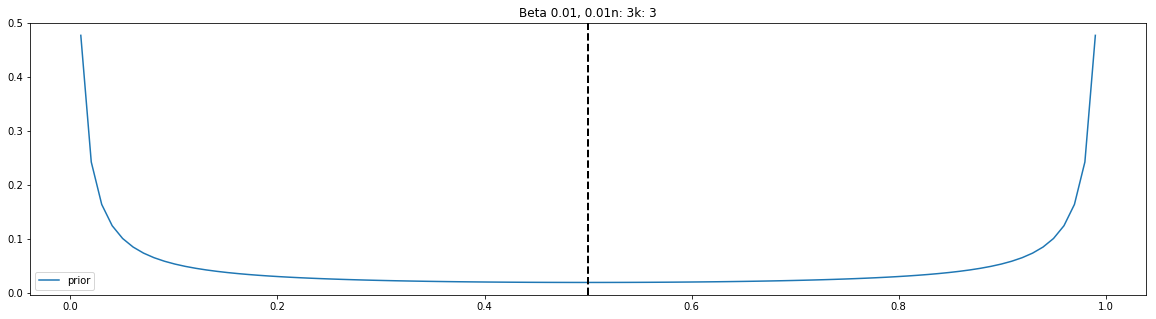

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1494.10it/s]


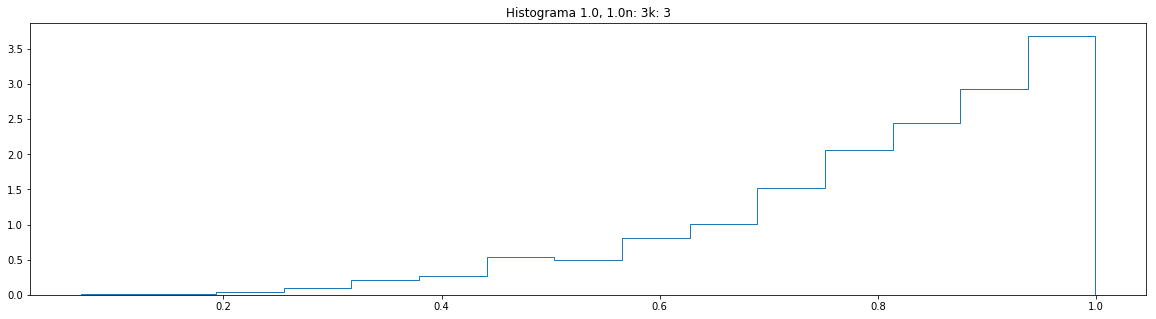

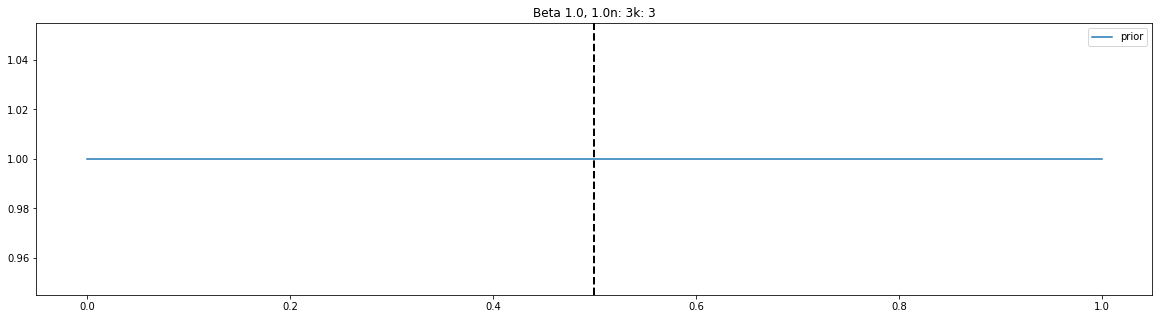

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1409.66it/s]


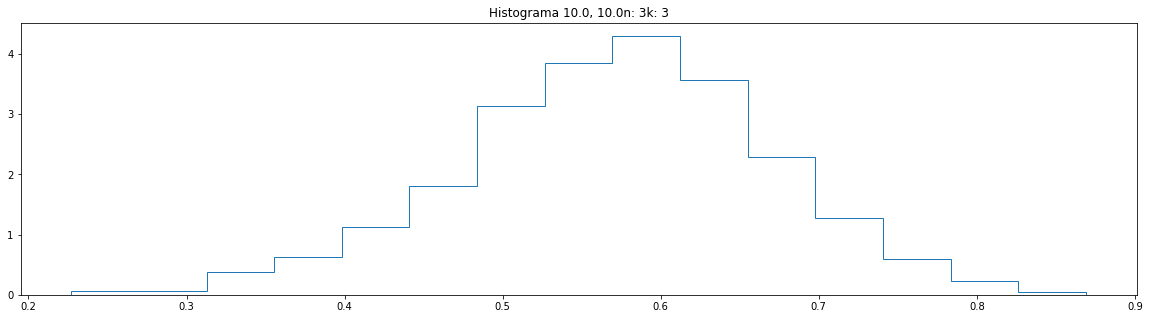

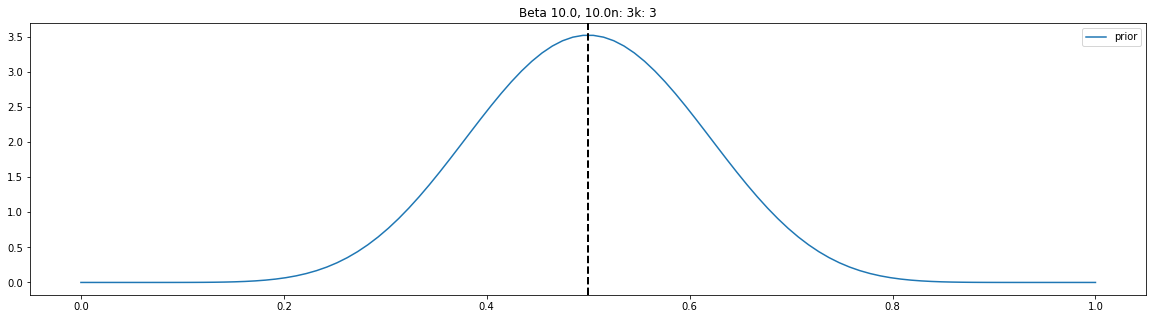

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1429.81it/s]


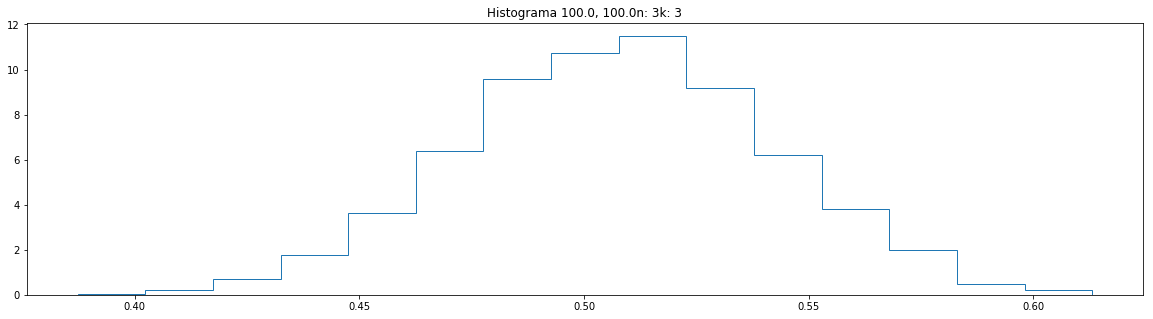

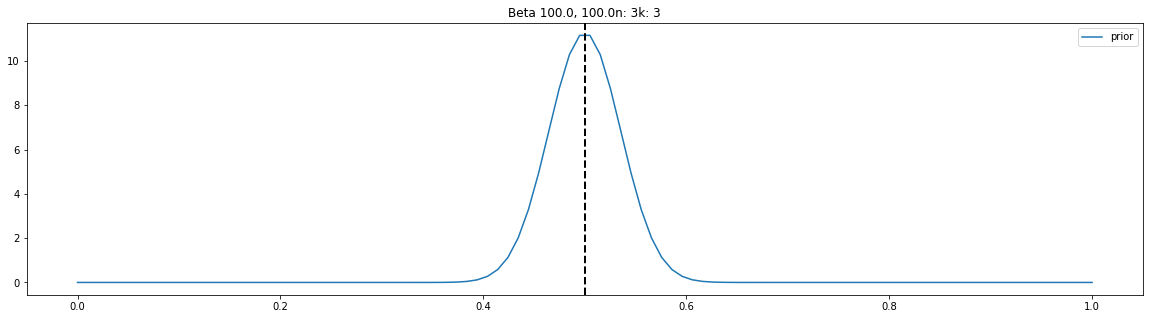

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1415.65it/s]


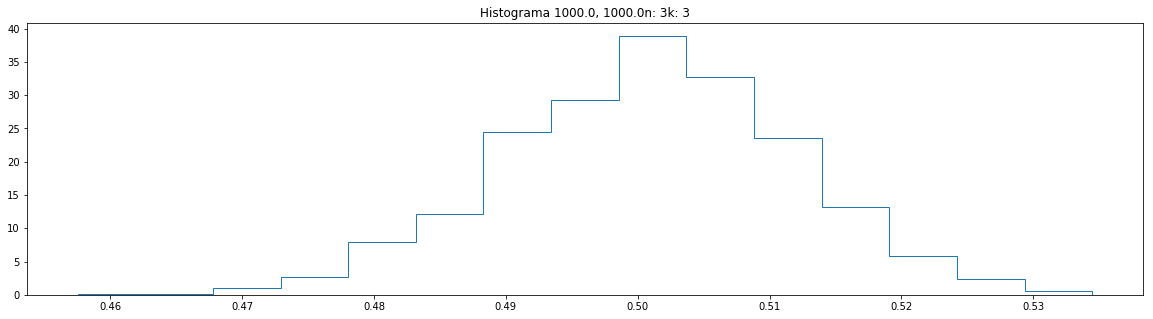

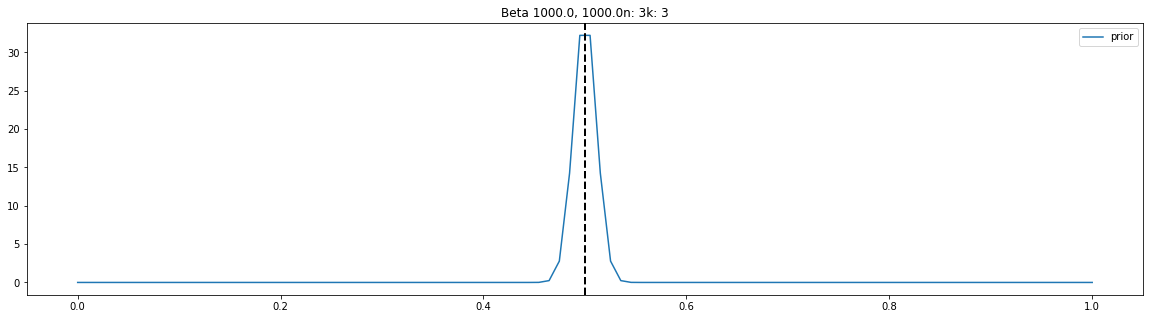

Map 3,3 beta 100


logp = 0.34264, ||grad|| = 1.5: 100%|██████████| 5/5 [00:00<00:00, 1138.95it/s]


{'prior_logodds__': array(0.02985283115328831), 'prior': array(0.507462653575417)}
Map 3,3 beta 1


logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 1898.28it/s]  

{'prior_logodds__': array(12.691930611010052), 'prior': array(0.999996924163579)}


In [127]:
plt_(20,20,0.01,0.01)
plt_(20,20,1.0,1.0)
plt_(20,20,10.0,10.0)
plt_(20,20,100.0,100.0)
plt_(20,20,1000.0,1000.0)

print "Map 20,20 beta 100"
MAP_20_100 = map_values(20,20,100.0, 100.0)
print MAP_20_100
print "Map 20,20 beta 1"
MAP_20_1 = map_values(20,20,1.0, 1.0)
print MAP_20_1

plt_(3,3,0.01,0.01)
plt_(3,3,1.0,1.0)
plt_(3,3,10.0,10.0)
plt_(3,3,100.0,100.0)
plt_(3,3,1000.0,1000.0)

print "Map 3,3 beta 100"
MAP_3_100 = map_values(3,3,100.0, 100.0)
print MAP_3_100
print "Map 3,3 beta 1"
MAP_3_1 = map_values(3,3,1.0, 1.0)
print MAP_3_1



# Ejercicio 5

8 caras consecutivas nos harían sospechar que la moneda está cargada. No pensamos en una moneda 100% cargada, pero sí una con un theta entre 0.6 y 0.8 aproximadamente. Para encontrar nuestro prior, realizamos un analisis similar al del ejercicio uno. Graficamos las posterior para distintos parámetros del prior Beta y elegimos la que tiene una distribución de posterior más cercana a nuestra creencia

In [6]:
def plt_ej5(n,h,alpha,beta):
# Misterio
    niter = 2000
    with pm.Model() as model: # context management
        # define priors
        p = pm.Beta('p', alpha=alpha, beta=beta)

        # define likelihood
        y = pm.Binomial('y', n=n, p=p, observed=h)

        trace = pm.sample(niter, random_seed=0, progressbar=True)
    plt.figure(figsize=(20,5))
    _, bins, rectangles = plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
    plt.title('Histograma ' +  str(alpha) + ', ' + str(beta) + " n: " + str(n) + "k: " + str(h))
    plt.show()
    plt.clf()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1357.28it/s]


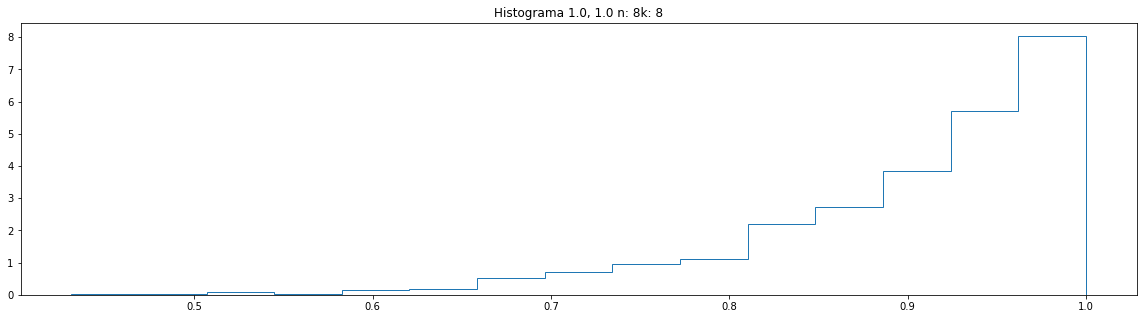

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1364.11it/s]


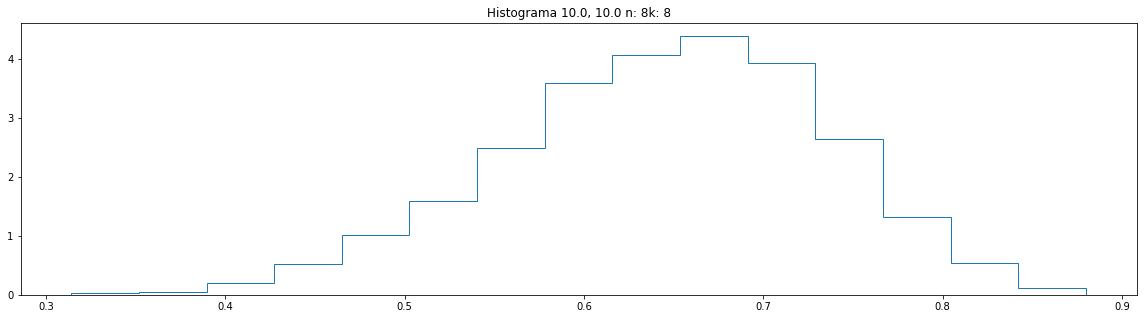

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1403.46it/s]


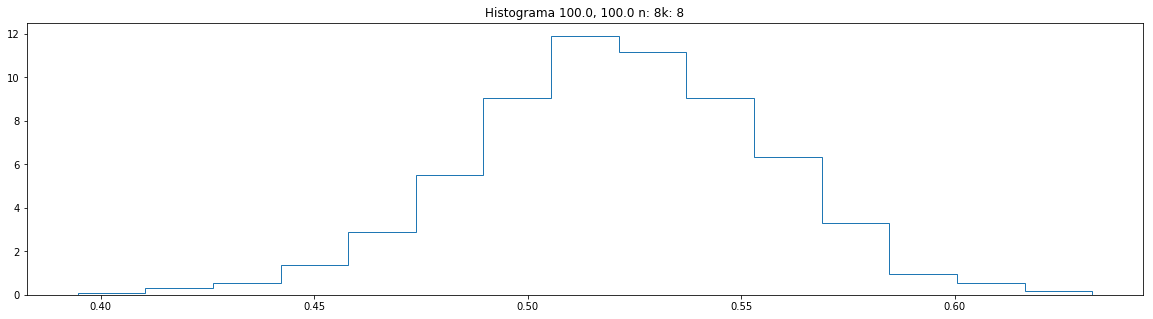

In [7]:
plt_ej5(8,8,1.0,1.0)
plt_ej5(8,8,10.0,10.0)
plt_ej5(8,8,100.0,100.0)

In [4]:
map_ej5 = map_values(8,8,10,10)

logp = -4.2856, ||grad|| = 4: 100%|██████████| 7/7 [00:00<00:00, 1305.94it/s]


In [5]:
map_ej5

{'prior': array(0.653846154513386),
 'prior_logodds__': array(0.6359887696680291)}

La distribución de posteriors que más se acerca a nuestra creencia se corresponde con el prior Beta(10, 10), por lo que este valor de priors es el seleccionado para nuestro modelo.

El theta que maximiza el posterior es 0.635 y se corresponde con la hipótesis planteada anteriormente